In [4]:
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
import numpy as np
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train) 
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent))) 
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))






Unique predicted labels: [False]
Test score: 0.90


In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train) 
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [6]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1).fit(X_train, y_train) 
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.84
logreg score: 0.98


In [7]:
from sklearn.metrics import confusion_matrix 
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[401   2]
 [  8  39]]


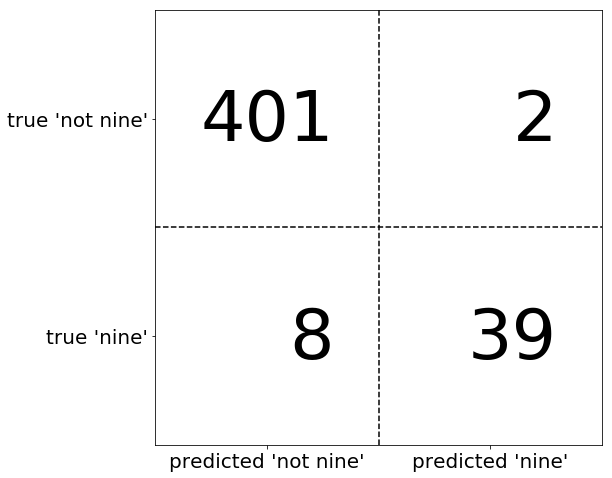

In [11]:
%matplotlib inline
import matplotlib
import mglearn
mglearn.plots.plot_confusion_matrix_illustration()

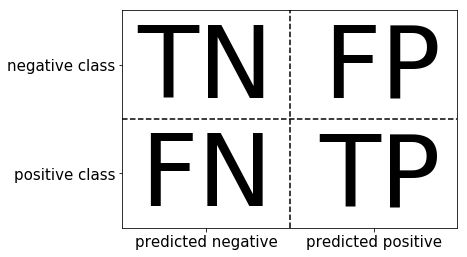

In [12]:
mglearn.plots.plot_binary_confusion_matrix()

In [13]:
print("Most frequent class:") 
print(confusion_matrix(y_test, pred_most_frequent)) 
print("\nDummy model:") 
print(confusion_matrix(y_test, pred_dummy)) 
print("\nDecision tree:") 
print(confusion_matrix(y_test, pred_tree)) 
print("\nLogistic Regression") 
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[363  40]
 [ 45   2]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[401   2]
 [  8  39]]


In [14]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format( f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy))) 
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree))) 
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.04
f1 score tree: 0.55
f1 score logistic regression: 0.89


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, pred_most_frequent,
                                target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.90      1.00      0.94       403
       nine       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
from mglearn.datasets import make_blobs
from sklearn.svm import SVC
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],
                      random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
mglearn.plots.plot_decision_threshold()

TypeError: unsupported operand type(s) for //: 'tuple' and 'int'

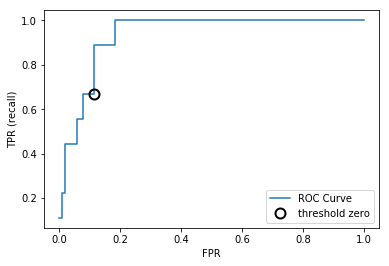

In [18]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds)) 
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
             label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [20]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,svc.decision_function(X_test)))

0.9337606837606838
